In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import json
import glob
import scipy.stats as ss
import matplotlib.pyplot as plt
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer

/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer


In [13]:
## making histograms of number of up genes and down genes remaining for each sample after removing genes from drugs

# loading signature data
infiles = glob.glob('rawdata/combinationdrugs.dir/*_updatedsignatures.json')

length_bottom_genes = []
length_top_genes = []

for infile in infiles:
    
    with open(infile) as infile2:
        sig = json.load(infile2)

    df_signatures = pd.DataFrame(sig).T
    
    # getting counts of up and down genes for each sample

    for sample, rowdata in df_signatures.iterrows():
        bottom = rowdata["bottom"]
        length_bottom = len(bottom)
        length_bottom_genes.append(length_bottom)
        top = rowdata["top"]
        length_top = len(top)
        length_top_genes.append(length_top)


df_genecounts = pd.DataFrame()
df_genecounts["bottom_counts"] = length_bottom_genes
df_genecounts["top_counts"] = length_top_genes



/Users/maayanlab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


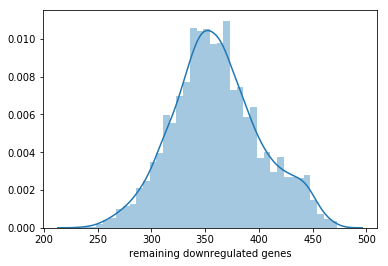

In [30]:
# plotting histogram

 
# Make default histogram of bottom genes remaining
fig = sns.distplot(df_genecounts["bottom_counts"])
fig.set(xlabel="remaining downregulated genes")
plt.show()


/Users/maayanlab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


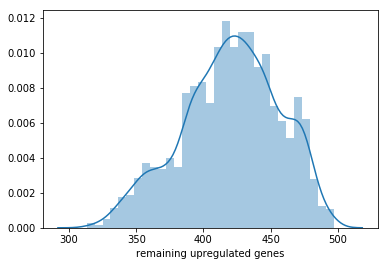

In [27]:
# Make default histogram of bottom genes remaining
fig2 = sns.distplot(df_genecounts["top_counts"])
fig2.set(xlabel="remaining upregulated genes")
plt.show()



In [49]:
# finding genes affected by paclitaxel for methods figure

infile_updatedsig = "./rawdata/combinationdrugs.dir/paclitaxel_updatedsignatures.json"
infile_sig = "./rawdata/TCGA-OV-fpkm_uq_signatures.json"
infile_drugsig = "./rawdata/combinationdrugs.dir/paclitaxel_signature_foreachdrugs_forplots2.json"

with open(infile_updatedsig) as infile_updated:
    updated_sig = json.load(infile_updated)
    
with open(infile_updatedsig) as sig2:
    original_sig = json.load(sig2)
    
with open(infile_drugsig) as drugsig2:
    drugsig = json.load(drugsig2)
    
df_updated = pd.DataFrame(updated_sig).T
df_updated = df_updated[0:1]
df_original = pd.DataFrame(original_sig).T
dict3 = drugsig

In [44]:
updated_top = df_updated["top"].tolist()
updated_bottom = df_updated["bottom"].tolist()
original_top = df_original["top"].tolist()
original_bottom = df_original["bottom"].tolist()

list_changes_top = [item for item in original_top if item not in updated_top]

In [100]:
## counting genes in each drug's signature

import os

# loading signature data
infiles2 = glob.glob('rawdata/combinationdrugs.dir/*_signature_foreachdrugs_forplots2.json')

drug_number_bottom_genes = []
drug_number_top_genes = []
drug_names = []

for infile in infiles2:
    
    with open(infile) as infile4:
        drug_sig = json.load(infile4)
    
    drug_name = os.path.basename(infile).split('_')[0]
    drug_names.append(drug_name)
    
    # getting counts of up and down genes for each drug signature
    drug_number_top_genes.append(len(np.unique(drug_sig["up"])))
    drug_number_bottom_genes.append(len(np.unique(drug_sig["down"])))
    

df_drugsig_genecounts = pd.DataFrame()
df_drugsig_genecounts["drug"] = drug_names
df_drugsig_genecounts["top_counts"] = drug_number_top_genes
df_drugsig_genecounts["bottom_counts"] = drug_number_bottom_genes
df_drugsig_genecounts_top = df_drugsig_genecounts.drop("bottom_counts", axis=1).rename(columns = {"top_counts" : "genes"})
df_drugsig_genecounts_bottom = df_drugsig_genecounts.drop("top_counts", axis=1).rename(columns = {"bottom_counts" : "genes"})
df_drugsig_genecounts_top["type"] = "top"
df_drugsig_genecounts_bottom["type"] = "bottom"                                                                                    
df_drugsig_genecounts_final = pd.concat([df_drugsig_genecounts_top, df_drugsig_genecounts_bottom])

In [103]:
df_drugsig_genecounts_final

,drug,genes,type
0,docetaxel,2537,top
1,irinotecan,2872,top
3,doxorubicin,4422,top
4,tamoxifen,4598,top
6,pemetrexed,1027,top
7,gemcitabine,4015,top
8,topotecan,2363,top
9,paclitaxel,3195,top
10,etoposide,2378,top
11,cyclophosphamide,408,top


In [102]:
df_drugsig_genecounts_final = df_drugsig_genecounts_final.drop([2, 5], axis=0)

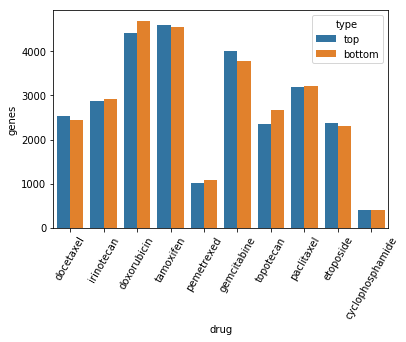

In [104]:
# plotting barplot of genes in each drug's signature

 
# Make default histogram of bottom genes remaining
fig = sns.barplot(x="drug", y="genes", hue = "type", data=df_drugsig_genecounts_final)
plt.xticks(rotation=60)
# fig.set(xlabel="remaining downregulated genes")
plt.show()

In [88]:
infile_cisplatin = "./rawdata/combinationdrugs.dir/cisplatin_updatedsignatures.json"
infile_doxorubicin = "./rawdata/combinationdrugs.dir/doxorubicin_updatedsignatures.json"

with open(infile_cisplatin) as infile5:
    cisplatin_updated = json.load(infile5)
with open(infile_doxorubicin) as openfile:
    doxorubicin_updated = json.load(openfile)
        
cisplatin = pd.DataFrame(cisplatin_updated)
doxorubicin = pd.DataFrame(doxorubicin_updated)

In [82]:
cisplatin.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
bottom,"[SLC35E2B, TMEM150A, GET4, FBXL17, NDST2, DENN...","[TMEM248, ZNF330, TMED5, NPM1P18, PA2G4P1, DAR...","[PCGF7P, OSBP, ENDOG, HNRNPA1P26, RAB17, AGO1,...","[BRWD3, BCL10, TMEM184C, RSPRY1, SEC23A, SECIS...","[STX17, PTGES3, IRF2, BOD1L1, MLH1, SEMA3F, LI...","[SNTB2, PXK, FGD5-AS1, ETV6, FBXO11, PRIMPOL, ...","[NECTIN4, AP4E1, TRAPPC10, DESI2, CCNDBP1, TRI...","[ZNF35, TBC1D19, RN7SL441P, DHX9P1, TUBA1C, PT...","[RNF168, HMGB1P40, RPL26P35, C12orf75, TLK1P1,...","[ACOT8, ZDHHC20, CAPN14, FANCF, NPM1P34, NUPL2...",...,"[VDAC1P3, XPNPEP3, SNORA70B, RN7SL336P, L3MBTL...","[TYSND1, SCAPER, DTX3L, ZNF836, PRRG4, RPUSD4,...","[RN7SL336P, EID3, ARF1P2, CPPED1, MALT1, MAPK9...","[RANP1, C14orf169, WIPI2, KIN, AGFG1, STAM2, D...","[TIGD7, NCLN, MTBP, NAIF1, DHX58, KIF27, CCDC1...","[KLHL14, SWI5, SUMO1P3, CD151, SEC23A, NEU3, T...","[ARHGAP44, SUMO1P4, RFESD, ZNF658B, COX20, EXO...","[SERPINH1, ARL8A, SLC25A43, ATG4D, NBPF9, PRCC...","[LRRC37A16P, JAK2, GNL1, TMEM132A, GAL3ST4, EE...","[SUSD6, CNEP1R1, TMEM106C, MCPH1, MSL3, ARSD, ..."
top,"[RNU6-156P, IGKV3D-34, RNU6-841P, TSKS, RNA5SP...","[RMRPP5, MIR4425, SNORD114-16, PMM2P1, SLC6A6P...","[RNU6-1252P, MIR521-1, TERF1P1, PCAT29, DRAIC,...","[CT45A2, RNA5SP499, C8A, SLC2A1-AS1, INTS4P1, ...","[MIR519E, RNU7-153P, VN1R74P, PAGE1, FAM90A9P,...","[DUX4L25, RNU6-889P, REXO1L3P, RNU6-405P, OR5B...","[RAB9AP2, RNU6-793P, MIR4508, OR10K2, HNRNPDLP...","[SNORD115-14, OFD1P3Y, IGHVIII-11-1, BOLA2P1, ...","[PRR27, IGHV1OR16-2, IGHV3-75, RNU6-732P, TRAV...","[FRG2FP, TMC2, LINC00964, RNU7-138P, MIR4760, ...",...,"[RNA5SP258, ZNF736P5Y, RNU6-1073P, MIR1911, MI...","[OR7E19P, OR7H1P, HOXD13, VGF, VEGFD, DLX1, SL...","[INSL5, RNA5SP49, RNA5SP293, IGHD1-20, MYLK4, ...","[MIR1202, FAM106CP, RNA5SP399, LINC00200, MIR5...","[MIR6802, NPPB, DEFB118, NPPA, ANKRD34C-AS1, C...","[SCNN1G, LINC01480, ERICH4, CEACAM21, GATA2, R...","[RNU6-502P, RGSL1, SAMD11P1, KRASP1, ENTHD1, E...","[MIR944, CPHL1P, RNU6-116P, SP3P, ZNF101P1, LI...","[MIR548AP, SDR42E1P4, LINC00710, SLC7A5P1, COX...","[RNU6-730P, RNU7-182P, MIR6515, EEF1A1P41, EEF..."


In [83]:
len(cisplatin["TCGA-04-1331-01"]["bottom"])

387

In [89]:
len(doxorubicin["TCGA-04-1331-01"]["bottom"])

356

In [105]:
len(doxorubicin["TCGA-04-1331-01"]["top"])

465